Name: I-Ting Yu, Github: eatingyu0820, USC ID: 5350526235

# HM3 - Time Series Classification
### 1. Part 1: Feature Creation/Extraction

**An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.**

(a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29. <br>The dataset contains 7 folders that represent seven types of activities. <br>In each folder, there are multiple files each of which represents an instant of a human performing an activity. 1 Each file containis 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.


Note: Each row corresponds to a time step measurement (in temporal order) and contains the following information:
avg_rss12, var_rss12, avg_rss13, var_rss13, avg_rss23, var_rss23
where avg and var are the mean and variance values over 250 ms of data, respectively.

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# ../data/CCPP/Folds5x2_pp.ods
#df = pd.read_excel('.../data/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1')
# path = '.../data/AReM/*'
# testfile_list = ['.../data/AReM/bending1/dataset1.csv','.../data/AReM/bending1/dataset2.csv',
#             '.../data/AReM/bending2/dataset1.csv', '.../data/AReM/bending2/dataset2.csv',
#             '.../data/AReM/cycling/dataset1.csv','.../data/AReM/cycling/dataset2.csv','.../data/AReM/cycling/dataset3.csv',
#             '.../data/AReM/lying/dataset1.csv','.../data/AReM/lying/dataset2.csv','.../data/AReM/lying/dataset3.csv',
#             '.../data/AReM/sitting/dataset1.csv','.../data/AReM/sitting/dataset2.csv','.../data/AReM/sitting/dataset3.csv',
#             '.../data/AReM/standing/dataset1.csv','.../data/AReM/standing/dataset2.csv','.../data/AReM/standing/dataset3.csv',
#             '.../data/AReM/walking/dataset1.csv','.../data/AReM/walking/dataset2.csv','.../data/AReM/walking/dataset3.csv']
# filename == '.../data/AReM/bending2/dataset4.csv':

#    /   = Root directory
#    .   = This location
#    ..  = Up a directory
#    ./  = Current directory
#    ../ = Parent of current directory
#    ../../ = Two directories backwards

**(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.**


In [3]:
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://jonathansoma.com/lede/foundations-2017/classes/working-with-many-files/class/

path = '../data/AReM/*'
train_li = []
test_li = []
all_files = glob.glob(os.path.join(path, "*.csv"))
testfile_list = ['../data/AReM/bending1/dataset1.csv','../data/AReM/bending1/dataset2.csv',
            '../data/AReM/bending2/dataset1.csv', '../data/AReM/bending2/dataset2.csv',
            '../data/AReM/cycling/dataset1.csv','../data/AReM/cycling/dataset2.csv','../data/AReM/cycling/dataset3.csv',
            '../data/AReM/lying/dataset1.csv','../data/AReM/lying/dataset2.csv','../data/AReM/lying/dataset3.csv',
            '../data/AReM/sitting/dataset1.csv','../data/AReM/sitting/dataset2.csv','../data/AReM/sitting/dataset3.csv',
            '../data/AReM/standing/dataset1.csv','../data/AReM/standing/dataset2.csv','../data/AReM/standing/dataset3.csv',
            '../data/AReM/walking/dataset1.csv','../data/AReM/walking/dataset2.csv','../data/AReM/walking/dataset3.csv']

for filename in sorted(all_files):
    if filename in testfile_list:
        df_test = pd.read_csv(filename, header=None, skiprows=5, skip_blank_lines=True)
        df_test.columns = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13", "avg_rss23","var_rss23"]
        test_li.append(df_test)
    elif filename == '../data/AReM/bending2/dataset4.csv':
        df_train = pd.read_csv(filename, header=None, skiprows=5, skip_blank_lines=True, delim_whitespace=True)
        df_train.columns = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13", "avg_rss23","var_rss23"]
        train_li.append(df_train)
    else: 
        df_train = pd.read_csv(filename, header=None, skiprows=5, skip_blank_lines=True, sep=',')
        df_train.columns = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13", "avg_rss23","var_rss23"]
        train_li.append(df_train)
print("--------------------------------------------------")
print("Test list length:",len(test_li))
print("Train list length:",len(train_li))
print("--------------------------------------------------\n")
test_data = pd.concat(test_li)
train_data = pd.concat(train_li)
print("*time: per 250 milliseconds")
print("--------------------Test data---------------------")
print(test_data)
print("-------------------Train data---------------------")
print(train_data)

--------------------------------------------------
Test list length: 19
Train list length: 69
--------------------------------------------------

*time: per 250 milliseconds
--------------------Test data---------------------
       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0         0      39.25       0.43      22.75       0.43      33.75       1.30
1       250      39.25       0.43      23.00       0.00      33.00       0.00
2       500      39.25       0.43      23.25       0.43      33.00       0.00
3       750      39.50       0.50      23.00       0.71      33.00       0.00
4      1000      39.50       0.50      24.00       0.00      33.00       0.00
..      ...        ...        ...        ...        ...        ...        ...
475  118750      36.00       2.45      17.00       5.10      20.50       0.87
476  119000      34.33       1.89      15.00       2.45      17.00       2.12
477  119250      33.00       7.35      14.60       3.14      13.00       

**(c) Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.**

i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

**1. Statistical Features:**
- Mean
- Median
- Standard Deviation
- Skewness, Kurtosis
- Minimum and Maximum

**2. Time Series Analysis Related Features:**
- Cross Correlation
- Auto Correlation
- Parameters of Autoregressive (AR) part of Autoregressive Integrated Moving Average (ARIMA) model
- Parameters of Moving Average (MA) part of ARIMA model
- Orders of AR, Integrated (I) and MA part of ARIMA model

ii. Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.2
Your new dataset will look like this:
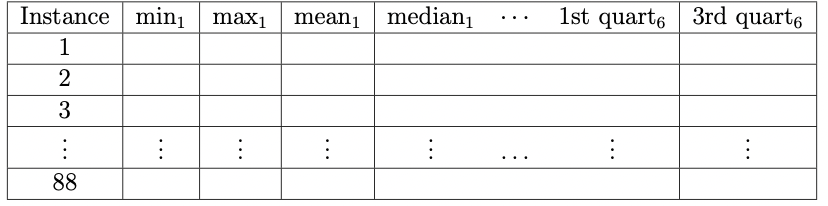
where, for example, 1st quart6, means the first quartile of the sixth time series in each of the 88 instances.

In [4]:
tempD = []
i = 0
frame = pd.concat([test_data,train_data])
time_series_df = pd.DataFrame(columns = ["min1","max1","mean1","median1","std1","1stQ1","3rdQ1",
                                         "min2","max2","mean2","median2","std2","1stQ2","3rdQn2",
                                         "min3","max3","mean3","median3","std3","1stQ3","3rdQ3",
                                         "min4","max4","mean4","median4","std4","1stQ4","3rdQ4",
                                         "min5","max5","mean5","median5","std5","1stQ5","3rdQ5",
                                         "min6","max6","mean6","median6","std6","1stQ6","3rdQ6"])             

for i in range(0,len(frame), i+480):
    mini = []
    maxi = []
    std = []
    meann = []
    medi = []
    firstQ = []
    thirdQ = []
    for j in range(1, len(frame.columns)):
        tempD = frame.iloc[i:i+480,j]
        minimum = tempD.min()
        maximum = tempD.max()
        mean = tempD.mean()
        median = tempD.median()
        stdv = tempD.std()
        fq = tempD.quantile(0.25)
        tq = tempD.quantile(0.75)
        
        mini.append(minimum)
        maxi.append(maximum)
        meann.append(mean)
        medi.append(median)
        std.append(stdv)
        firstQ.append(fq)
        thirdQ.append(tq)    
        
#     print(mini)
#     print(mini[0:len(mini):6][0])
    time_series_df.loc[len(time_series_df.index)]= (mini[0:len(mini):6][0],maxi[0:len(mini):6][0],meann[0:len(meann):6][0],std[0:len(std):6][0],medi[0:len(medi):6][0],firstQ[0:len(firstQ):6][0],thirdQ[0:len(thirdQ):6][0],
                                                    mini[1:len(mini):6][0],maxi[1:len(maxi):6][0],meann[0:len(meann):6][0],std[0:len(std):6][0],medi[0:len(medi):6][0],firstQ[0:len(firstQ):6][0],thirdQ[0:len(thirdQ):6][0],
                                                    mini[2:len(mini):6][0],maxi[2:len(maxi):6][0],meann[0:len(meann):6][0],std[0:len(std):6][0],medi[0:len(medi):6][0],firstQ[0:len(firstQ):6][0],thirdQ[0:len(thirdQ):6][0],
                                                    mini[3:len(mini):6][0],maxi[3:len(maxi):6][0],meann[0:len(meann):6][0],std[0:len(std):6][0],medi[0:len(medi):6][0],firstQ[0:len(firstQ):6][0],thirdQ[0:len(thirdQ):6][0],
                                                    mini[4:len(mini):6][0],maxi[4:len(maxi):6][0],meann[0:len(meann):6][0],std[0:len(std):6][0],medi[0:len(medi):6][0],firstQ[0:len(firstQ):6][0],thirdQ[0:len(thirdQ):6][0],
                                                    mini[5:len(mini):6][0],maxi[5:len(maxi):6][0],meann[0:len(meann):6][0],std[0:len(std):6][0],medi[0:len(medi):6][0],firstQ[0:len(firstQ):6][0],thirdQ[0:len(thirdQ):6][0])
print("--------------------------------------------------")
print("Total observations in time-domain feature data:", len(time_series_df))
print("Total features in time-domain feature data:", len(time_series_df.columns))
print("--------------------------------------------------")
print("p.s. < 1:avg_rss12  2:var_rss12  3:avg_rss13  4:var_rss13  5:avg_rss23  6:var_rss23 >")

time_series_df        
        
# #print(mini)    
# print("length:",len(mini))
# print("length:",len(maxi))
# print("length:",len(meann))
# print("length:",len(medi))



--------------------------------------------------
Total observations in time-domain feature data: 88
Total features in time-domain feature data: 42
--------------------------------------------------
p.s. < 1:avg_rss12  2:var_rss12  3:avg_rss13  4:var_rss13  5:avg_rss23  6:var_rss23 >


,min1,max1,mean1,median1,std1,1stQ1,3rdQ1,min2,max2,mean2,...,std5,1stQ5,3rdQ5,min6,max6,mean6,median6,std6,1stQ6,3rdQ6
0,37.25,45.00,40.624792,1.476967,40.500,39.2500,42.0000,0.0,1.30,40.624792,...,40.500,39.2500,42.0000,0.0,1.92,40.624792,1.476967,40.500,39.2500,42.0000
1,38.00,45.67,42.812812,1.435550,42.500,42.0000,43.6700,0.0,1.22,42.812812,...,42.500,42.0000,43.6700,0.0,3.11,42.812812,1.435550,42.500,42.0000,43.6700
2,12.75,51.00,24.562958,3.737514,24.250,23.1875,26.5000,0.0,6.87,24.562958,...,24.250,23.1875,26.5000,0.0,4.97,24.562958,3.737514,24.250,23.1875,26.5000
3,0.00,42.75,27.464604,3.583582,28.000,25.5000,30.0000,0.0,7.76,27.464604,...,28.000,25.5000,30.0000,0.0,6.76,27.464604,3.583582,28.000,25.5000,30.0000
4,24.25,45.00,37.177042,3.581301,36.250,34.5000,40.2500,0.0,8.58,37.177042,...,36.250,34.5000,40.2500,0.0,9.34,37.177042,3.581301,36.250,34.5000,40.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,4.742208,35.290,31.6700,38.2500,0.0,12.68,34.763333,...,35.290,31.6700,38.2500,0.0,9.39,34.763333,4.742208,35.290,31.6700,38.2500
84,21.50,51.00,34.935813,4.645944,35.500,32.0000,38.0625,0.0,12.21,34.935813,...,35.500,32.0000,38.0625,0.0,10.21,34.935813,4.645944,35.500,32.0000,38.0625
85,18.33,47.67,34.333042,4.948770,34.750,31.2500,38.0000,0.0,12.48,34.333042,...,34.750,31.2500,38.0000,0.0,8.01,34.333042,4.948770,34.750,31.2500,38.0000
86,18.33,45.75,34.599875,4.731790,35.125,31.5000,38.0000,0.0,15.37,34.599875,...,35.125,31.5000,38.0000,0.0,8.86,34.599875,4.731790,35.125,31.5000,38.0000


iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [5]:
#Standard deviation of all time-domain features
std_df = pd.DataFrame(columns = ["Feature Name","Standard Deviation"])
temp_df = []
std = []
#print(time_series_df['min1'].std())
for i, column in enumerate(time_series_df):
    tempD = time_series_df.iloc[:,i]
    stdv = tempD.std()
    std.append(stdv)
    std_df.loc[len(std_df.index)] = (time_series_df.columns[i],std[i])
print("--------------------------------------------------")
print("Total amount of features' std:",len(std))
print("p.s. < 1:rss12  2:var_rss12  3:avg_rss13  4:var_rss13  5:vg_rss23  6:ar_rss23 >")
print("--------------------------------------------------")
print('STANDARD DEVIATION OF TIME-DOMAIN FEATURES:')
std_df


--------------------------------------------------
Total amount of features' std: 42
p.s. < 1:rss12  2:var_rss12  3:avg_rss13  4:var_rss13  5:vg_rss23  6:ar_rss23 >
--------------------------------------------------
STANDARD DEVIATION OF TIME-DOMAIN FEATURES:


,Feature Name,Standard Deviation
0,min1,9.955581
1,max1,4.394362
2,mean1,5.334976
3,median1,1.760085
4,std1,5.440054
5,1stQ1,6.153590
6,3rdQ1,5.138925
7,min2,0.000000
8,max2,5.062729
9,mean2,5.334976


In [6]:
# 90% bootstrap confidence interval for standard deviation of each feature
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html
from scipy.stats import bootstrap
# import bootstrapped.bootstrap as bs

std_df = pd.DataFrame(columns = ["Feature Name","Standard Deviation"])
temp_df = []
# std = []
#print(time_series_df['min1'].std())
for i, column in enumerate(time_series_df):
    tempD = time_series_df.iloc[:,i]
    tempD = np.array(tempD)
    tempD = (tempD,)
    res = bootstrap(tempD, np.std, confidence_level=0.9, method='basic').confidence_interval
#     std.append(res)
#     std_df.loc[len(std_df.index)] = (time_series_df.columns[i],std[i])
    print(res)

# print("--------------------------------------------------")
# print("Total amount of features' std:",len(std))
# print("p.s. < 1:rss12  2:var_rss12  3:avg_rss13  4:var_rss13  5:vg_rss23  6:ar_rss23 >")
# print("--------------------------------------------------")
# print('STANDARD DEVIATION OF TIME-DOMAIN FEATURES:')


ConfidenceInterval(low=8.61589948982836, high=11.328048645132476)
ConfidenceInterval(low=3.4823142247839787, high=5.410644394709468)
ConfidenceInterval(low=4.765697336565364, high=5.9297724814829795)
ConfidenceInterval(low=1.5744654140143746, high=1.953273628446294)
ConfidenceInterval(low=4.851243318504486, high=6.050486679909069)
ConfidenceInterval(low=5.622065496687893, high=6.6864182437187685)
ConfidenceInterval(low=4.417656786281677, high=5.921738616002646)
ConfidenceInterval(low=0.0, high=0.0)
ConfidenceInterval(low=4.688695601405556, high=5.4660146862655905)
ConfidenceInterval(low=4.761384004972618, high=5.919608537562798)
ConfidenceInterval(low=1.5706229146540218, high=1.9523135942977017)
ConfidenceInterval(low=4.861721464110241, high=6.051364701687807)
ConfidenceInterval(low=5.6282809468840105, high=6.6828486241450555)
ConfidenceInterval(low=4.420028793366398, high=5.916253058311404)
ConfidenceInterval(low=2.7955193599648074, high=3.138657197666876)
ConfidenceInterval(low=4.259

iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

- **Mean:** We could easily know the measure of the overall average tendency of RSS data distribution from each person. 
- **Median:** It is less affected by very large or very small values(outliers and skewed data) so we could use it as a preferred measure of central tendency when the distribution is not symmetrical..
- **Standard Deviation:** It is good way to see the dispersion of each person RSS data and std dev is always fixed and well defined.

### 2. ISLR 3.7.4

**I collect a set of data (n = 100 observations) containing a single
predictor and a quantitative response. I then fit a linear regression
model to the data, as well as a separate cubic regression, i.e. Y =
β0 + β1X + β2X2 + β3X3 + ϵ.**

(a) Suppose that the true relationship between X and Y is linear,
i.e. Y = β0 + β1X + ϵ. Consider the training residual sum of
squares (RSS) for the linear regression, and also the training
RSS for the cubic regression. Would we expect one to be lower
than the other, would we expect them to be the same, or is there
not enough information to tell? Justify your answer.

**Answer:**
<br>
I believe the polynomial regression would be lower than the linear regression. The reason is that polynomial regression is much closer to the data matched with a wider irreducible error

(b) Answer (a) using test rather than training RSS.

**Answer:**
<br>
I believe the result will be totally opposite with (a), the polynomial regression would be higher than the linear regression because of overfitting and this would present higher error than linear regression.

(c) Suppose that the true relationship between X and Y is not linear,
but we don’t know how far it is from linear. Consider the training
RSS for the linear regression, and also the training RSS for the
cubic regression. Would we expect one to be lower than the
other, would we expect them to be the same, or is there not
enough information to tell? Justify your answer.

**Answer:**
<br>
I believe the result will be the same as (a) becasue polynomial regression fits a wide range of curvature which means higher flexibility(smaller RSS). This would not affect whether the underlying true relationship of X and Y.

(d) Answer (c) using test rather than training RSS.
<br><br>
**Answer:**
<br>
In this case, we could not know whether polynomial regression is higher or lower than linear regression because we don't know the distance from linear and it is unclear on what level of flexibility will fit this data better.